## Interactive Sales Dashboard - EDA

This notebook performs an **Exploratory Data Analysiss (EDA)** on the Global Superstore dataset, which contains information on sales, profit, discounts, and regional performance.

THe goal is to **understand the dataset's structure**, identify potential issues(missing values, outliers), and extract initial insights to guide te preprocessing phase and the development of an intereactive sales dashboard.

**Key questions:**
1. How are sales and profits distributed?
2. Which months, years, categories, and regions perform better? 
3. Is there a relationship between discount, quantity, profit, and sales?
4. Are there any missing values or inconsistencies?o

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# visual configurations
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
df = pd.read_csv('../data/superstore.csv', encoding='utf-8')

In [3]:
# First lines
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [4]:
# Structure and data types
df.info()

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for duplicate rows
print(df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [5]:
# Convert data types
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'], errors='coerce')

# Check if order dates are before ship dates
for row in df[['Order.Date', 'Ship.Date']].itertuples():
    if row._1 > row._2:
        print(f"Order date {row._1} is not before ship date {row._2}.")

print("Data types after conversion:")
df.info()


Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   记录数             51290 non-null  int64         
 8   Order.Date      51290 non-null  datetime64[ns]
 9   Order.ID        51290 non-null  object        
 10  Order.Priority  51290 non-null  object        
 11  Product.ID      51290 non-null  object        
 12  Product.Name    51290 non-null  object        
 13  Profit          51290 non-null  float64       
 14  Quantity        51290 non

In [6]:
print(df['Category'].unique())
print(df['Sub.Category'].unique())
print(df['Segment'].unique())

['Office Supplies' 'Technology' 'Furniture']
['Paper' 'Art' 'Storage' 'Appliances' 'Supplies' 'Envelopes' 'Fasteners'
 'Labels' 'Binders' 'Accessories' 'Phones' 'Copiers' 'Machines' 'Tables'
 'Bookcases' 'Chairs' 'Furnishings']
['Consumer' 'Home Office' 'Corporate']


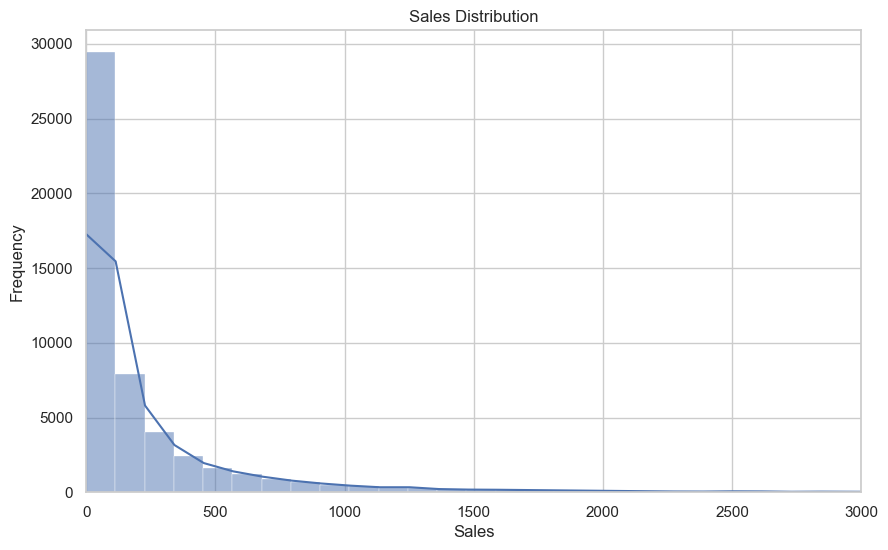

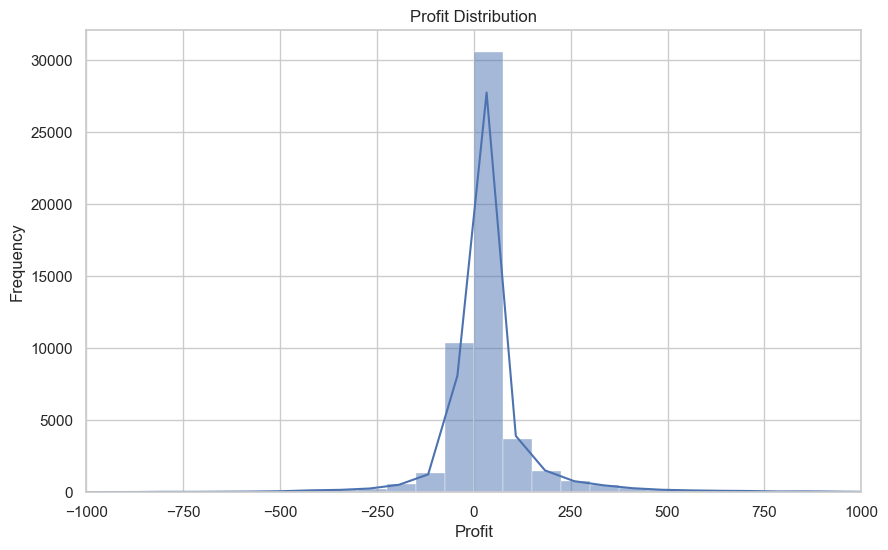

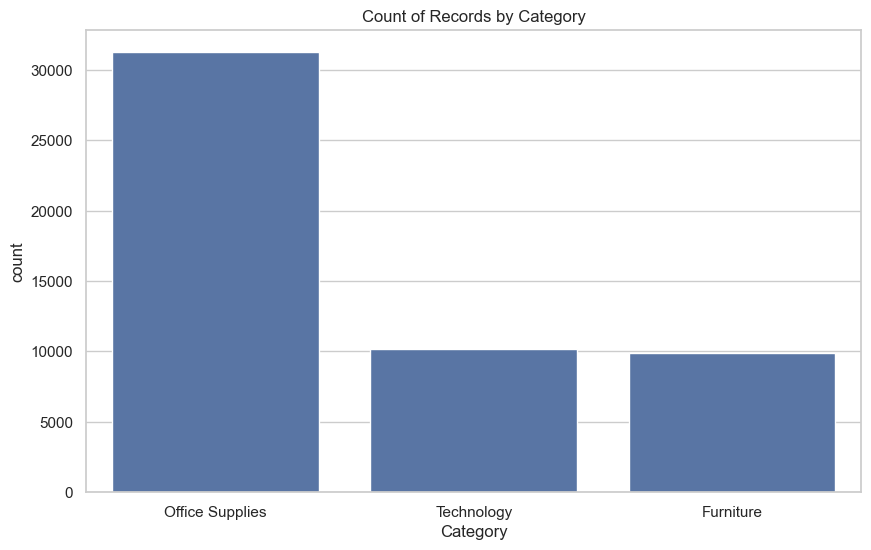

In [7]:
# Plot sales histogram
sns.histplot(df['Sales'], bins=200, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.xlim([0, 3000])
plt.show()

# Plot profit histogram
sns.histplot(df['Profit'], bins=200, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.xlim([-1000, 1000])
plt.show()

# Category
sns.countplot(x='Category', data=df)
plt.title("Count of Records by Category")
plt.show()


   Year    Sales
0  2011  2259511
1  2012  2677493
2  2013  3405860
3  2014  4300041


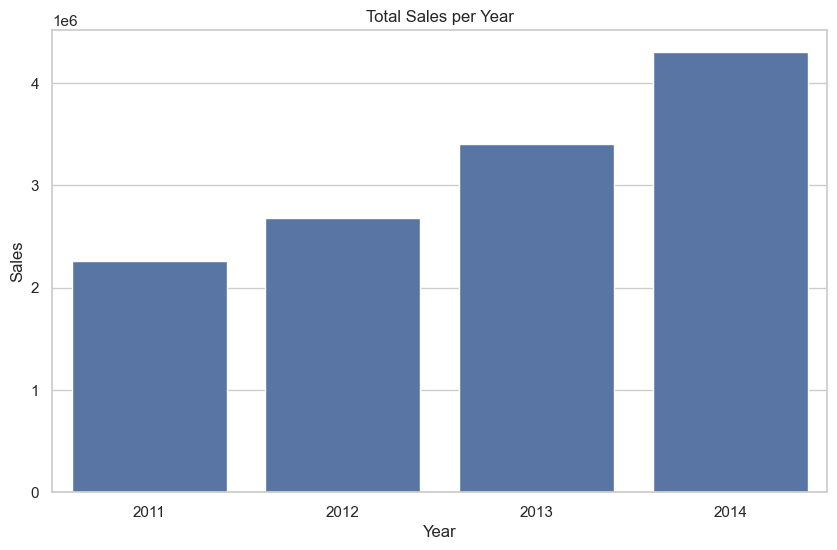

    Month    Sales
0       1   675141
1       2   543768
2       3   770519
3       4   698603
4       5   904061
5       6  1269751
6       7   749423
7       8  1293852
8       9  1437432
9      10  1168220
10     11  1551319
11     12  1580816


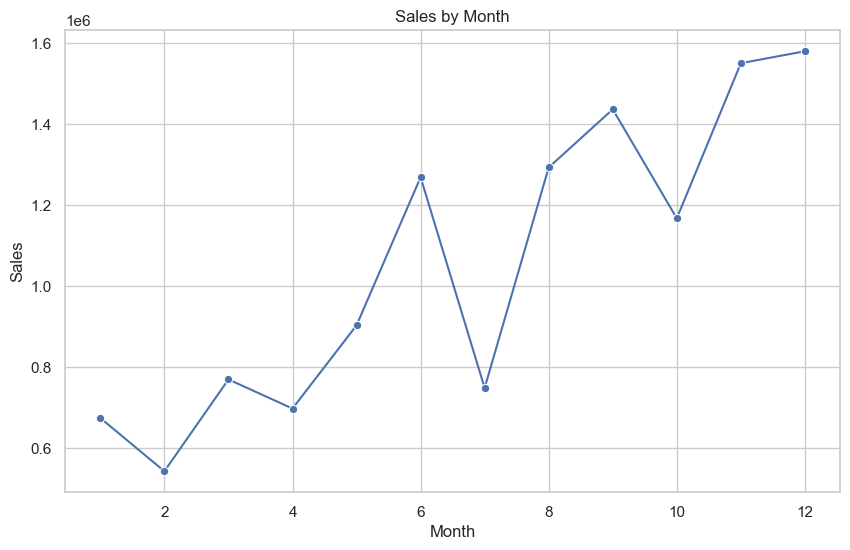

In [8]:
# Sales per year
df['Year'] = df['Order.Date'].dt.year
sales_per_year = df.groupby('Year')['Sales'].sum().reset_index()
print(sales_per_year)

sns.barplot(x='Year', y='Sales', data=sales_per_year)
plt.title('Total Sales per Year')
plt.show()

# Sales per month 
df['Month'] = df['Order.Date'].dt.month
sales_by_month = df.groupby('Month')['Sales'].sum().reset_index()
print(sales_by_month)

sns.lineplot(x='Month', y='Sales', data=sales_by_month, marker='o')
plt.title("Sales by Month")
plt.show()

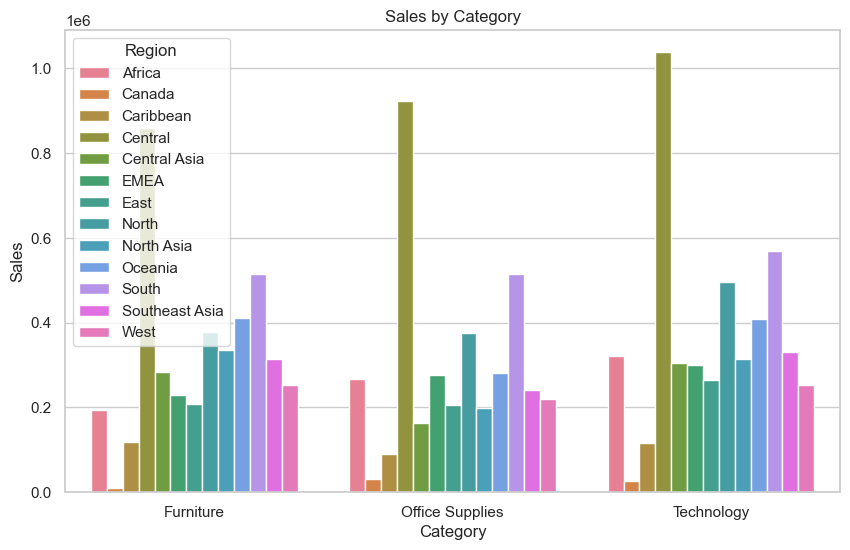

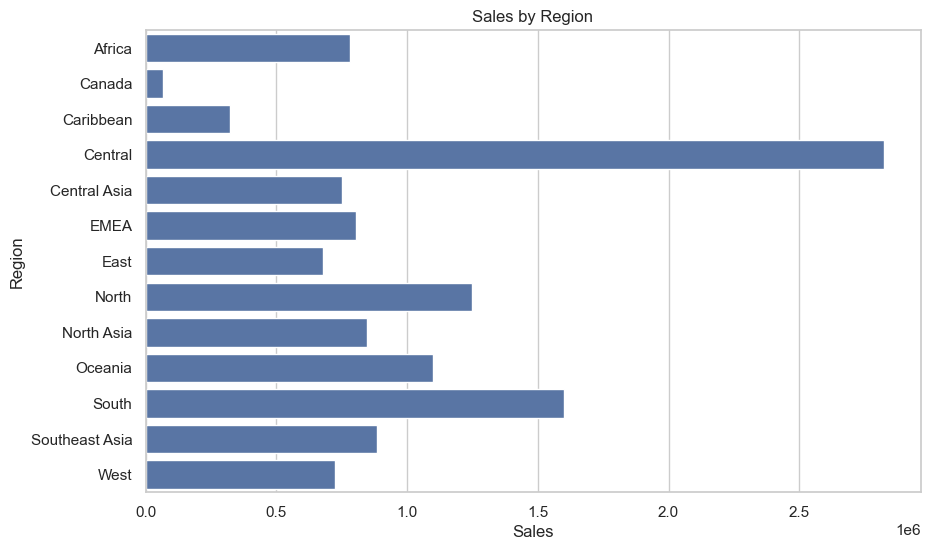

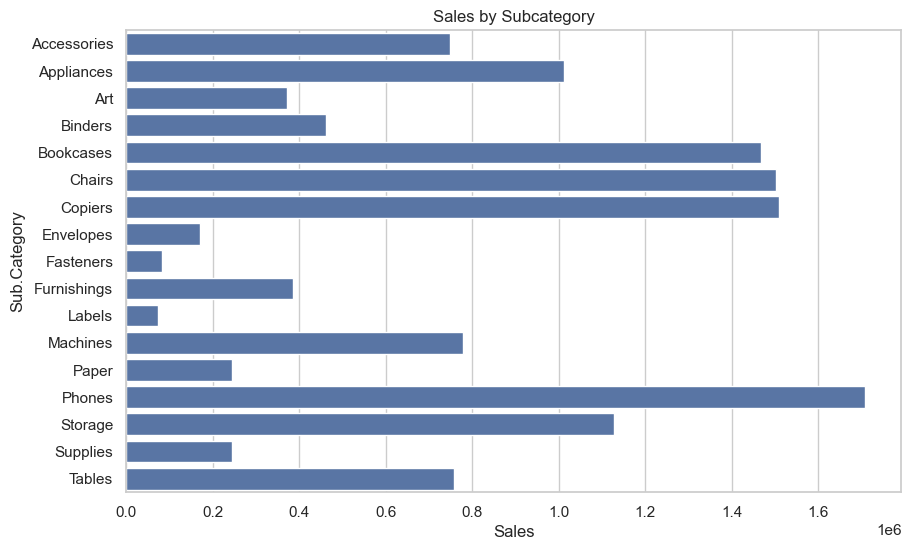

In [17]:
# Sales per category
sales_by_cat = df.groupby(['Category', 'Region'])['Sales'].sum().reset_index()
sns.barplot(x='Category', y='Sales', hue='Region', data=sales_by_cat)
plt.title("Sales by Category")
plt.show()

# Sales by region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
sns.barplot(x='Sales', y='Region', data=sales_by_region)
plt.title("Sales by Region")
plt.show()

# Sales per subcategory
sales_by_subcat = df.groupby('Sub.Category')['Sales'].sum().reset_index()
sns.barplot(x='Sales', y='Sub.Category', data=sales_by_subcat)
plt.title("Sales by Subcategory")
plt.show()



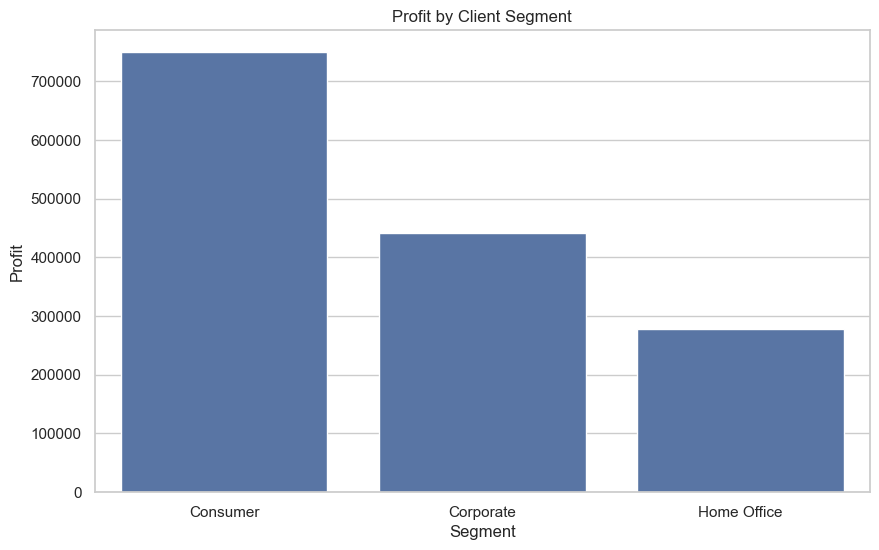

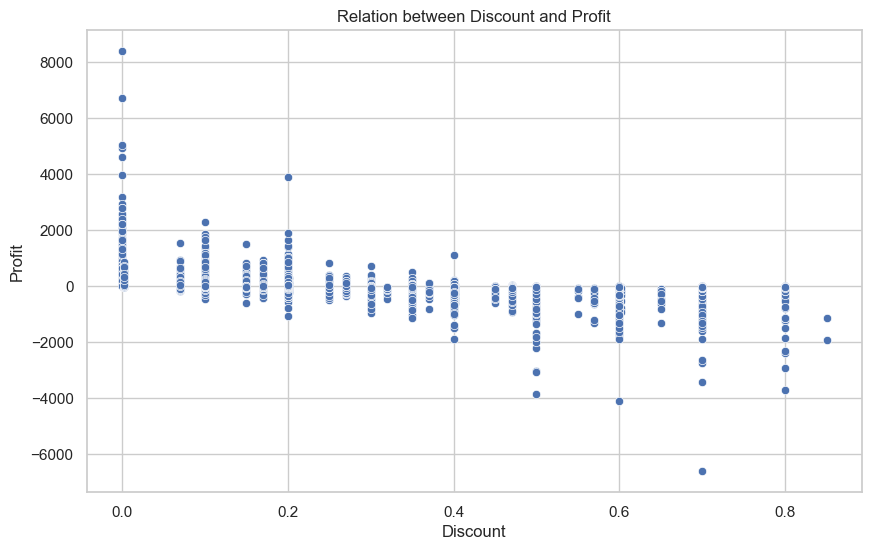

In [10]:
# Profit per client segment
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()
sns.barplot(x='Segment', y='Profit', data=profit_by_segment)
plt.title("Profit by Client Segment")
plt.show()

# Relation between discount and profit
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Relation between Discount and Profit")
plt.show()

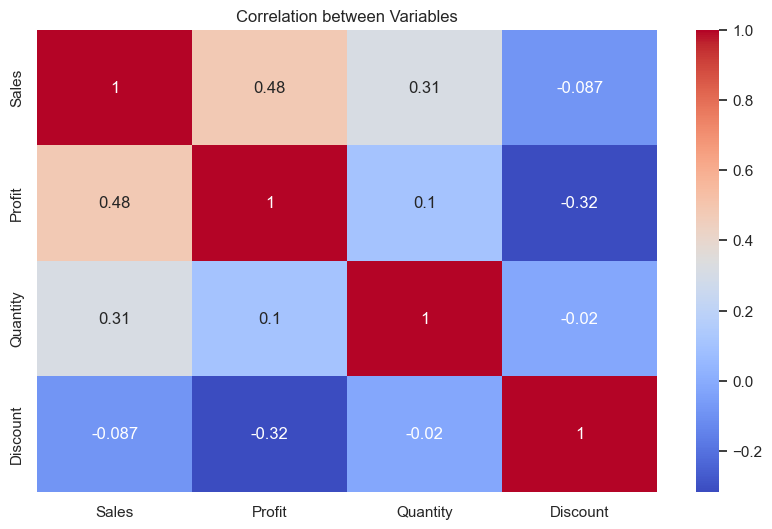

In [11]:
# Correlation heatmap
numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Variables")
plt.show()


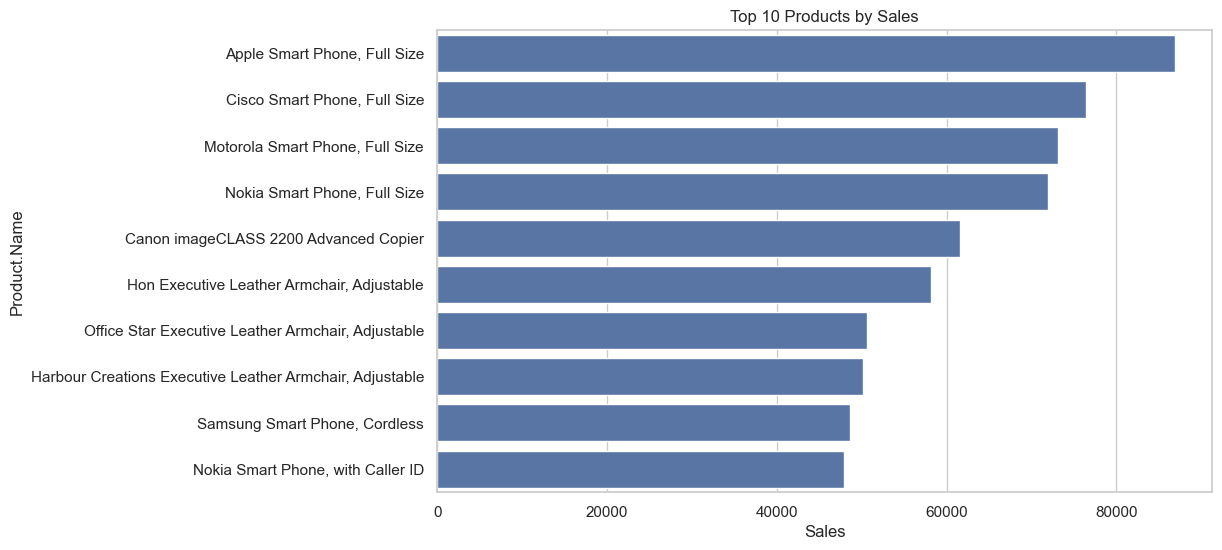

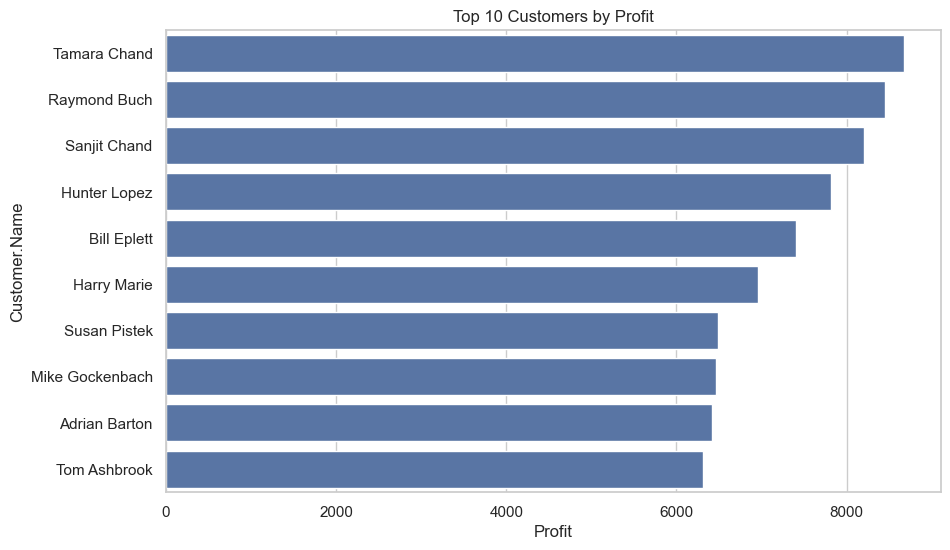

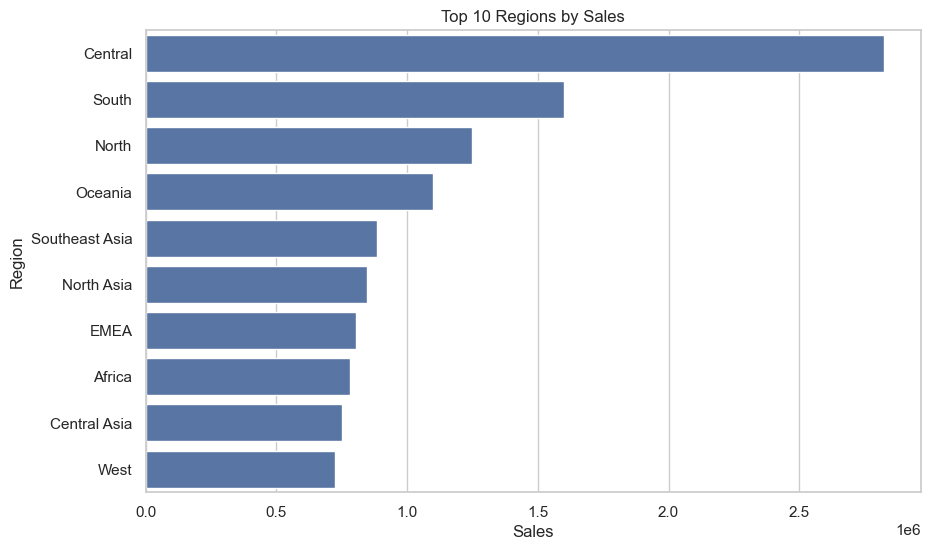

In [12]:
# Top 10 Products by Sales
top_10_products = df.groupby('Product.Name')['Sales'].sum().nlargest(10).reset_index()
sns.barplot(x='Sales', y='Product.Name', data=top_10_products)
plt.title("Top 10 Products by Sales")
plt.show()

# Top 10 Customers by Profit
top_10_customers = df.groupby('Customer.Name')['Profit'].sum().nlargest(10).reset_index()
sns.barplot(x='Profit', y='Customer.Name', data=top_10_customers)
plt.title("Top 10 Customers by Profit")
plt.show()

# Top 10 Regions by Sales
top_10_regions = df.groupby('Region')['Sales'].sum().nlargest(10).reset_index()
sns.barplot(x='Sales', y='Region', data=top_10_regions)
plt.title("Top 10 Regions by Sales")
plt.show()


In [13]:
# Products with negative profit
negative_profit_products = df[df['Profit'] < 0]
print("Products with negative profit:")
print(negative_profit_products[['Product.Name', 'Profit']])

Products with negative profit:
                                            Product.Name    Profit
29009                      Nokia Headset, with Caller ID  -24.2715
29012                      Canon Fax Machine, High-Speed  -19.0170
29018                           StarTech Calculator, Red   -0.0495
29021                      Samsung Audio Dock, Full Size   -6.7560
29024                           Canon Fax Machine, Laser -111.4995
...                                                  ...       ...
51156         Motorola HK250 Universal Bluetooth Headset  -12.4146
51163  Anker Astro Mini 3000mAh Ultra-Compact Portabl...   -7.9960
51164         Motorola HK250 Universal Bluetooth Headset  -20.6910
51180                        Shocksock Galaxy S4 Armband   -3.5040
51186         Motorola HK250 Universal Bluetooth Headset  -28.9674

[12544 rows x 2 columns]
